In [95]:
# Impory Required Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage


In [2]:
#loading Dataset
df= pd.read_excel('triproute.xls')

In [3]:
# Lets see the Data dimensions
df.shape

(728, 11)

In [4]:
#Glimse of the data with columns observations
df.head()

,Trip_id,fuel_consumption,total_time,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc
0,1,1.633,00:43:37,30.494434,0,22676.0,0,118,184,4,1
1,2,0.284,00:14:10,18.058823,0,4000.0,0,60,77,3,1
2,3,0.088,00:02:33,18.087805,0,824.0,0,45,19,1,2
3,4,1.021,00:17:20,44.190735,0,13515.0,0,108,86,1,0
4,5,0.271,00:10:34,23.780981,0,4307.0,13,65,82,3,3


In [5]:
#Lets see the column names 
df.columns

Index(['Trip_id', 'fuel_consumption', 'total_time', 'average_speed', 'Crash',
       'distance_travelled', 'Alarms', 'max_speed', 'speedoverlimit',
       'SuddenDcc', 'SuddenAcc'],
      dtype='object')

In [6]:
# Check for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_id             728 non-null    int64  
 1   fuel_consumption    719 non-null    float64
 2   total_time          728 non-null    object 
 3   average_speed       728 non-null    float64
 4   Crash               728 non-null    int64  
 5   distance_travelled  682 non-null    float64
 6   Alarms              728 non-null    int64  
 7   max_speed           728 non-null    int64  
 8   speedoverlimit      728 non-null    int64  
 9   SuddenDcc           728 non-null    int64  
 10  SuddenAcc           728 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 62.7+ KB


In [7]:
# Lets check for Null Values
df.isnull().sum()

Trip_id                0
fuel_consumption       9
total_time             0
average_speed          0
Crash                  0
distance_travelled    46
Alarms                 0
max_speed              0
speedoverlimit         0
SuddenDcc              0
SuddenAcc              0
dtype: int64

In [8]:
#lets correct the dimention of the time
df['total_time']=df['total_time'].astype(np.str)
hour=[]
minute=[]
second=[]
for i in df['total_time']:
    hour.append(str(i.split(':')[0]))
    minute.append(str(i.split(':')[1]))
    second.append(str(i.split(':')[2]))
    
    

In [9]:
hour1=[]
minute1=[]
second1=[]
for i in hour:
    hour1.append(int(i))
for i in minute:
    minute1.append(int(i))
for i in second:
    second1.append(int(i))

In [10]:
h=np.array(hour1)
m=np.array(minute1)
s=np.array(second1)

In [11]:
time_in_hr=h+(m/60)+(s/(60*60))

In [12]:
df['Total_time_hr']=time_in_hr

In [13]:
#distance travelled should be in km
df['distance_travelled']=df['distance_travelled']/1000

In [14]:
#null values
df.isnull().sum()

Trip_id                0
fuel_consumption       9
total_time             0
average_speed          0
Crash                  0
distance_travelled    46
Alarms                 0
max_speed              0
speedoverlimit         0
SuddenDcc              0
SuddenAcc              0
Total_time_hr          0
dtype: int64

In [15]:
df['fuel_consumption']=df['fuel_consumption'].fillna(df['fuel_consumption'].median())

In [16]:
df.isnull().sum()

Trip_id                0
fuel_consumption       0
total_time             0
average_speed          0
Crash                  0
distance_travelled    46
Alarms                 0
max_speed              0
speedoverlimit         0
SuddenDcc              0
SuddenAcc              0
Total_time_hr          0
dtype: int64

In [17]:
df.loc[df.distance_travelled.isna(),"distance_travelled"]=df['average_speed']*df['Total_time_hr']

In [18]:
df.isnull().sum()

Trip_id               0
fuel_consumption      0
total_time            0
average_speed         0
Crash                 0
distance_travelled    0
Alarms                0
max_speed             0
speedoverlimit        0
SuddenDcc             0
SuddenAcc             0
Total_time_hr         0
dtype: int64

# feature engineering


In [19]:
df["DT_to_Fuel_ratio"]=df['distance_travelled']/df['fuel_consumption']
df

,Trip_id,fuel_consumption,total_time,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc,Total_time_hr,DT_to_Fuel_ratio
0,1,1.633,00:43:37,30.494434,0,22.676,0,118,184,4,1,0.726944,13.886099
1,2,0.284,00:14:10,18.058823,0,4.000,0,60,77,3,1,0.236111,14.084507
2,3,0.088,00:02:33,18.087805,0,0.824,0,45,19,1,2,0.042500,9.363636
3,4,1.021,00:17:20,44.190735,0,13.515,0,108,86,1,0,0.288889,13.237023
4,5,0.271,00:10:34,23.780981,0,4.307,13,65,82,3,3,0.176111,15.892989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,724,0.296,00:05:59,24.893618,0,4.000,0,52,29,3,0,0.099722,13.513514
724,725,0.171,00:03:49,53.956800,0,3.747,0,72,16,1,0,0.063611,21.912281
725,726,1.355,00:31:14,32.827724,0,17.499,0,111,199,10,8,0.520556,12.914391
726,727,0.726,00:38:02,13.623775,0,8.723,13,55,161,1,0,0.633889,12.015152


In [20]:
df.isnull().sum()

Trip_id               0
fuel_consumption      0
total_time            0
average_speed         0
Crash                 0
distance_travelled    0
Alarms                0
max_speed             0
speedoverlimit        0
SuddenDcc             0
SuddenAcc             0
Total_time_hr         0
DT_to_Fuel_ratio      0
dtype: int64

In [21]:
df1=df

In [22]:
df1.head()

,Trip_id,fuel_consumption,total_time,average_speed,Crash,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc,Total_time_hr,DT_to_Fuel_ratio
0,1,1.633,00:43:37,30.494434,0,22.676,0,118,184,4,1,0.726944,13.886099
1,2,0.284,00:14:10,18.058823,0,4.000,0,60,77,3,1,0.236111,14.084507
2,3,0.088,00:02:33,18.087805,0,0.824,0,45,19,1,2,0.042500,9.363636
3,4,1.021,00:17:20,44.190735,0,13.515,0,108,86,1,0,0.288889,13.237023
4,5,0.271,00:10:34,23.780981,0,4.307,13,65,82,3,3,0.176111,15.892989


In [23]:
# We are dropping these columns as they won't help in any further analysis
df1 = df1.drop(['Trip_id','Crash','total_time'],axis=1)

In [24]:
df1.head()

,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc,Total_time_hr,DT_to_Fuel_ratio
0,1.633,30.494434,22.676,0,118,184,4,1,0.726944,13.886099
1,0.284,18.058823,4.000,0,60,77,3,1,0.236111,14.084507
2,0.088,18.087805,0.824,0,45,19,1,2,0.042500,9.363636
3,1.021,44.190735,13.515,0,108,86,1,0,0.288889,13.237023
4,0.271,23.780981,4.307,13,65,82,3,3,0.176111,15.892989


<AxesSubplot:>

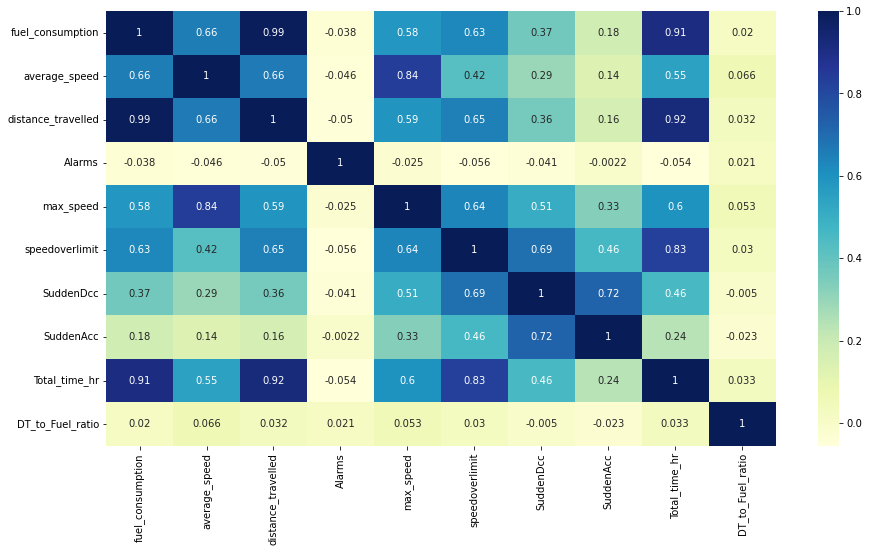

In [25]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")  

In [26]:
#huge multicolinearity

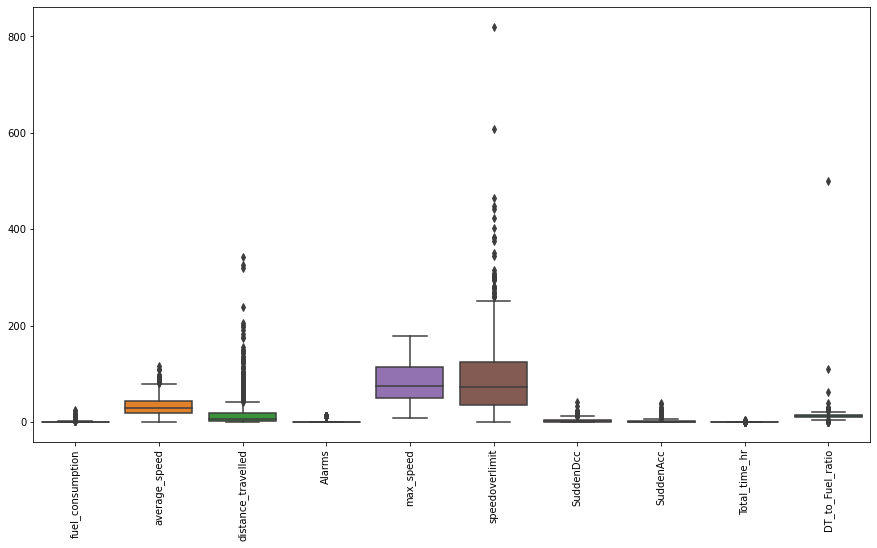

In [27]:
# Lets check for presence of outliers in the Data 
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()

In [28]:
# lets check varience of every feature
df1.var()

fuel_consumption         7.069664
average_speed          450.870071
distance_travelled    1497.941782
Alarms                  11.819488
max_speed             1683.647186
speedoverlimit        6962.778806
SuddenDcc               19.970175
SuddenAcc               21.194311
Total_time_hr            0.207392
DT_to_Fuel_ratio              NaN
dtype: float64

In [29]:
df['Alarms'].unique()

array([ 0, 13], dtype=int64)

# Univariate

OverflowError: cannot convert float infinity to integer

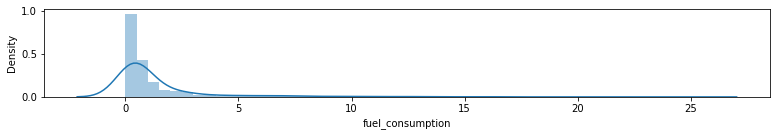

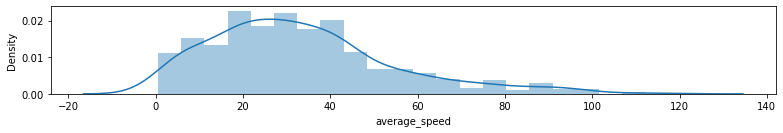

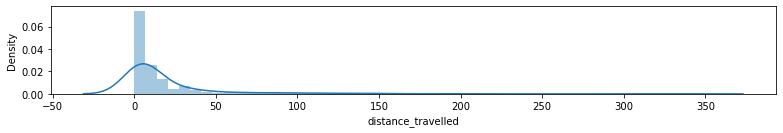

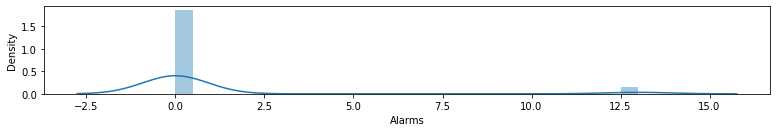

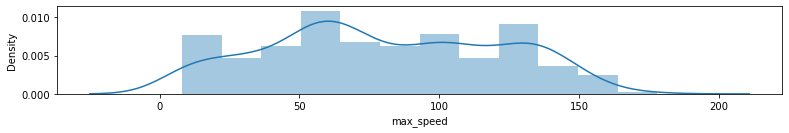

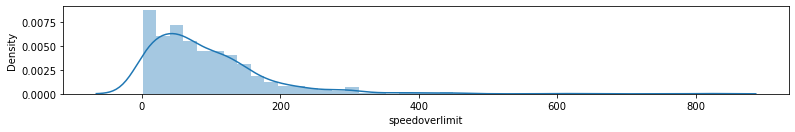

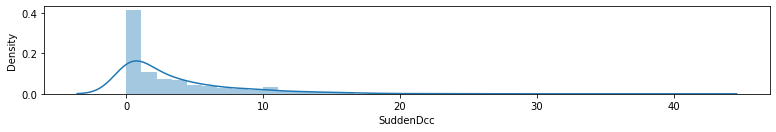

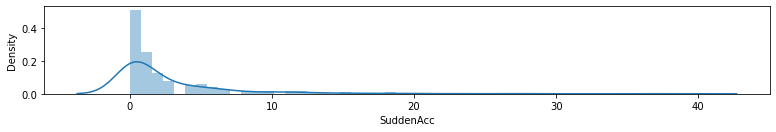

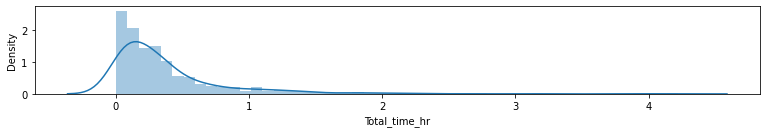

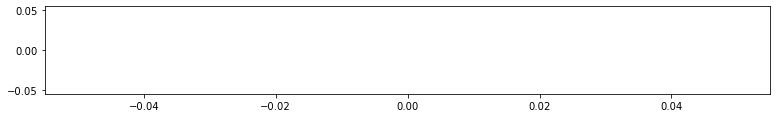

In [30]:
# Check for distribution of numerical data 
a=10
b=1
c=1
for i in df1:
    plt.figure(figsize=(13,19))
    plt.subplot(a,b,c)
    sns.distplot(df1[i])
    c=c+1

# Bivariate analysis

### 1) Numerical v/s Numerical

<Figure size 720x720 with 0 Axes>

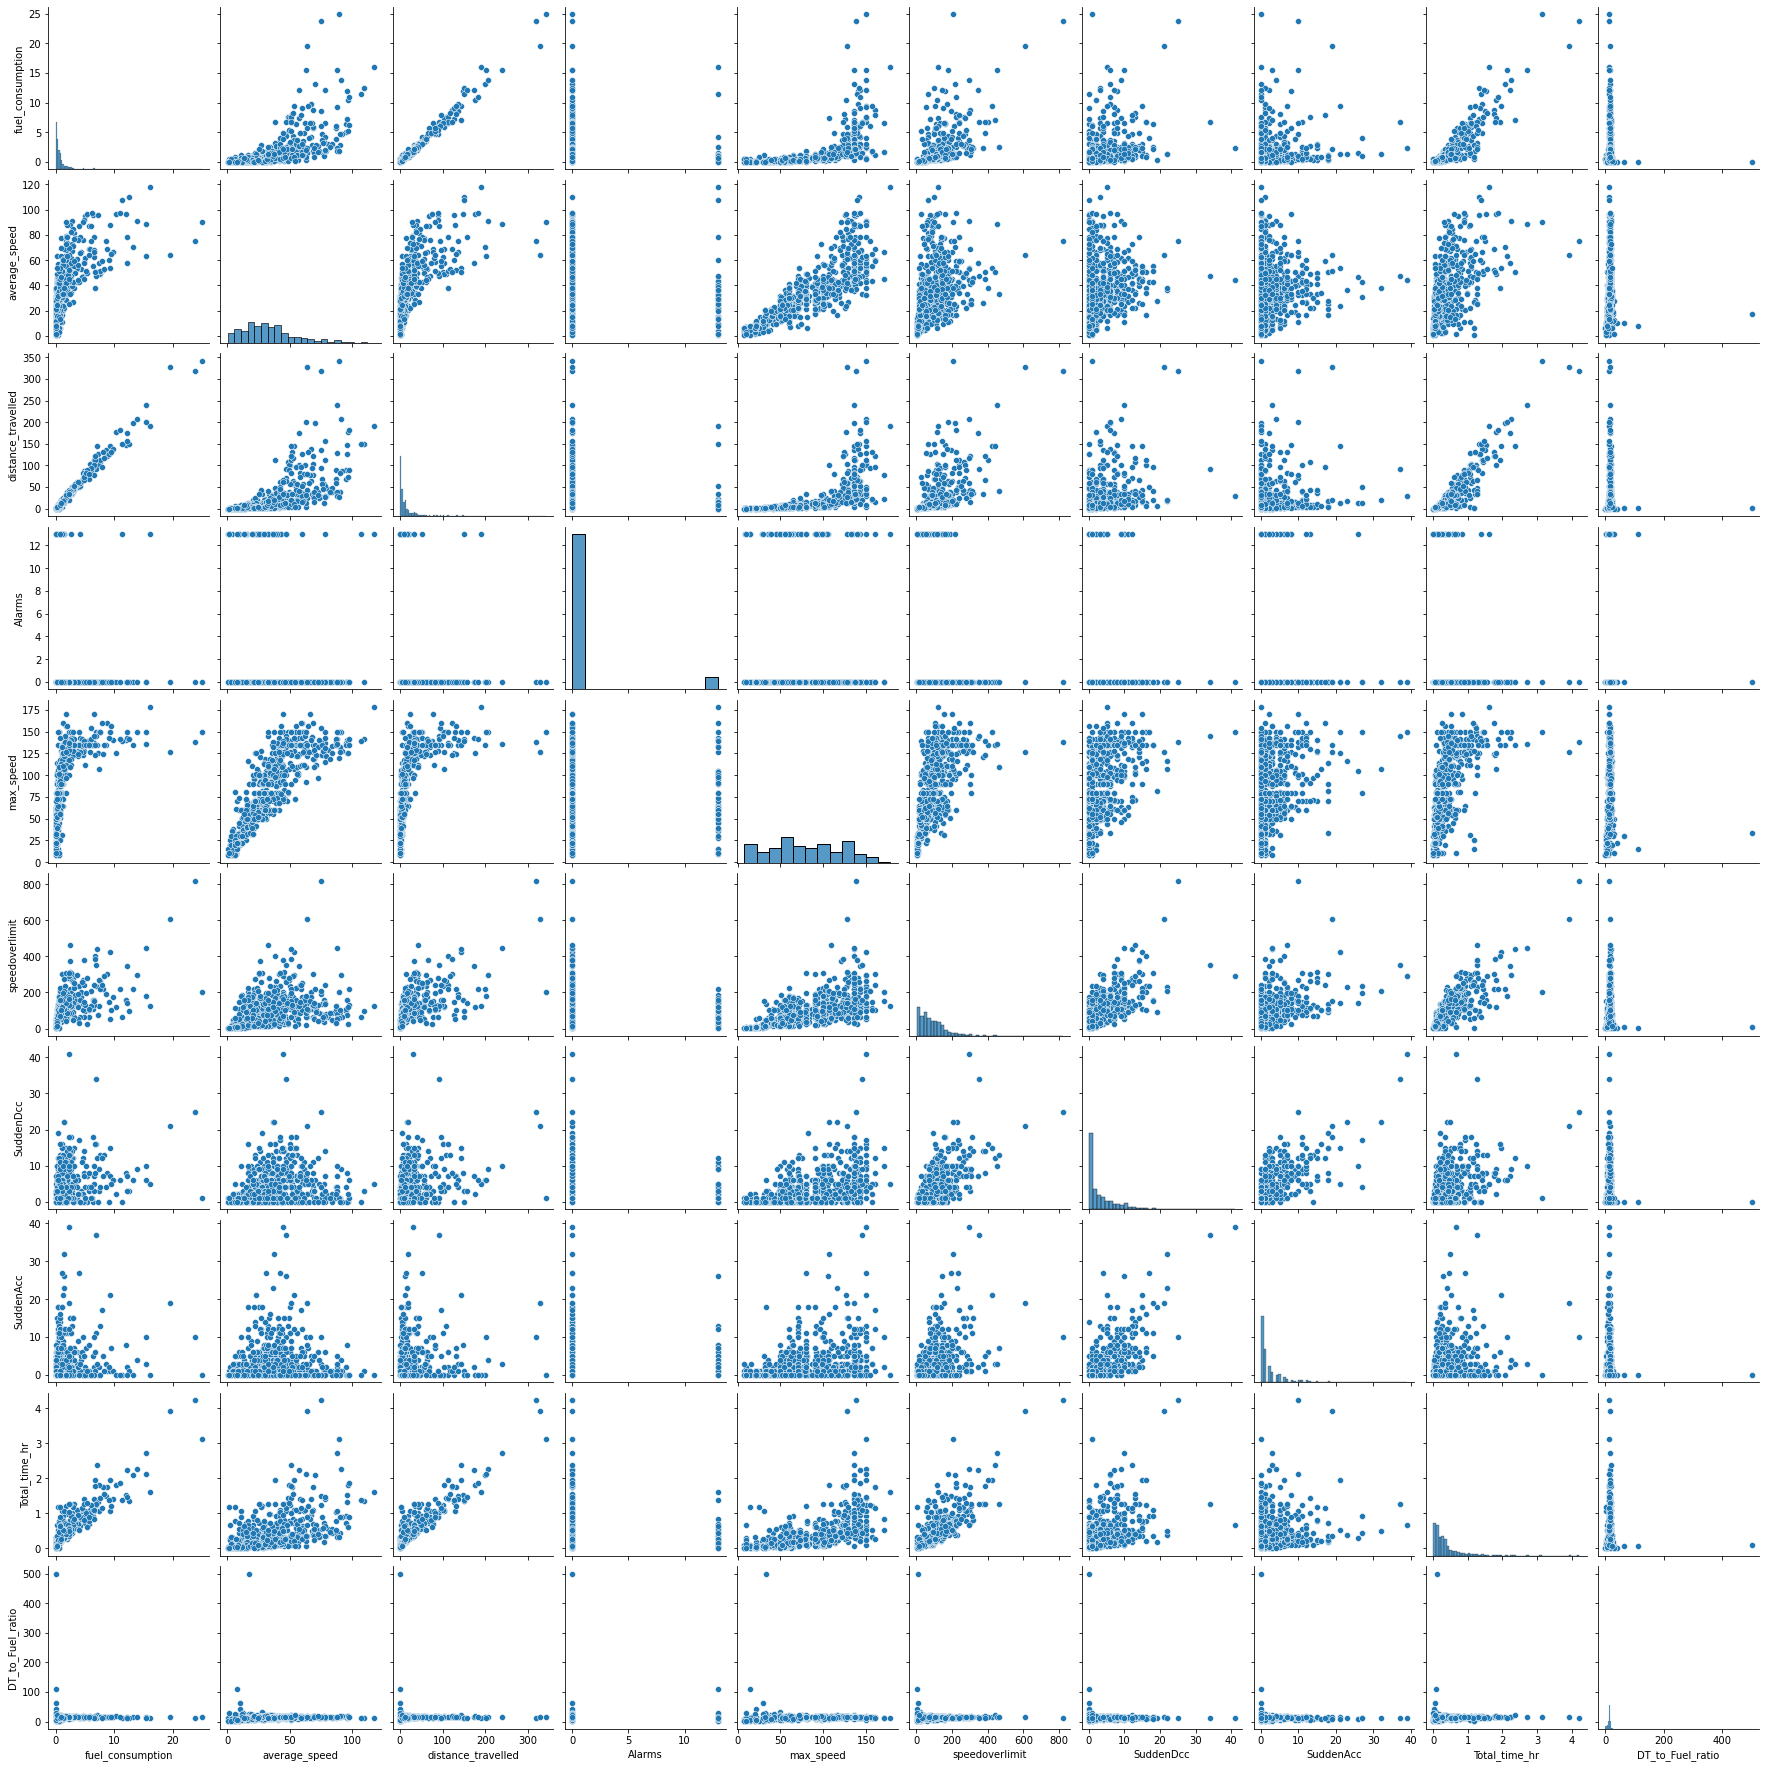

In [31]:
#Lets visualize out numerical data with scatterplot
plt.figure(figsize=(10,10))
sns.pairplot(df1)
plt.show()

In [34]:
df1.head(5)

,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc,Total_time_hr,DT_to_Fuel_ratio
0,1.633,30.494434,22.676,0,118,184,4,1,0.726944,13.886099
1,0.284,18.058823,4.000,0,60,77,3,1,0.236111,14.084507
2,0.088,18.087805,0.824,0,45,19,1,2,0.042500,9.363636
3,1.021,44.190735,13.515,0,108,86,1,0,0.288889,13.237023
4,0.271,23.780981,4.307,13,65,82,3,3,0.176111,15.892989


In [35]:
df1.dtypes

fuel_consumption      float64
average_speed         float64
distance_travelled    float64
Alarms                  int64
max_speed               int64
speedoverlimit          int64
SuddenDcc               int64
SuddenAcc               int64
Total_time_hr         float64
DT_to_Fuel_ratio      float64
dtype: object

In [42]:
df1.round(0)

,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc,Total_time_hr,DT_to_Fuel_ratio
0,2.0,30.0,23.0,0,118,184,4,1,1.0,14.0
1,0.0,18.0,4.0,0,60,77,3,1,0.0,14.0
2,0.0,18.0,1.0,0,45,19,1,2,0.0,9.0
3,1.0,44.0,14.0,0,108,86,1,0,0.0,13.0
4,0.0,24.0,4.0,13,65,82,3,3,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...
723,0.0,25.0,4.0,0,52,29,3,0,0.0,14.0
724,0.0,54.0,4.0,0,72,16,1,0,0.0,22.0
725,1.0,33.0,17.0,0,111,199,10,8,1.0,13.0
726,1.0,14.0,9.0,13,55,161,1,0,1.0,12.0


In [68]:
sc = StandardScaler()
# Assigning numerical values and storing in another column
ps = sc.fit_transform(df1)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [56]:
df1.isnull().sum()

fuel_consumption      0
average_speed         0
distance_travelled    0
Alarms                0
max_speed             0
speedoverlimit        0
SuddenDcc             0
SuddenAcc             0
Total_time_hr         0
DT_to_Fuel_ratio      0
dtype: int64

In [62]:
np.isfinite(df1).any()

fuel_consumption      True
average_speed         True
distance_travelled    True
Alarms                True
max_speed             True
speedoverlimit        True
SuddenDcc             True
SuddenAcc             True
Total_time_hr         True
DT_to_Fuel_ratio      True
dtype: bool

In [65]:
np.isnan(df1).any()

fuel_consumption      False
average_speed         False
distance_travelled    False
Alarms                False
max_speed             False
speedoverlimit        False
SuddenDcc             False
SuddenAcc             False
Total_time_hr         False
DT_to_Fuel_ratio      False
dtype: bool

In [76]:
df1[np.isfinite(df1["DT_to_Fuel_ratio"])==False]

,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc,Total_time_hr,DT_to_Fuel_ratio
131,0,4,0,0,8,1,0,0,0,inf
197,0,0,0,0,8,1,0,0,0,inf
208,0,2,0,0,8,1,0,0,0,inf
235,0,4,0,0,10,3,0,0,0,inf
420,0,2,0,0,8,1,0,0,0,inf
468,0,5,0,0,10,2,0,0,0,inf


In [80]:
data = df1.drop([131,197,208,235,420,468])

In [81]:
sc = StandardScaler()
# Assigning numerical values and storing in another column
ps = sc.fit_transform(data)

In [82]:
from sklearn.cluster import KMeans

In [83]:
k = KMeans(n_clusters=3 , random_state=0)
k.fit_predict(ps)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [84]:
n_clusters = np.arange(1,11)

 # error -  within clusters sum of square (wcss)
wcss = []    
for i in n_clusters:
    k = KMeans(n_clusters=i , random_state= 0)
    k.fit(ps)
    wcss.append(k.inertia_)
    print(wcss)
    

[7220.0]
[7220.0, 5180.186007456602]
[7220.0, 5180.186007456602, 4117.404540867462]
[7220.0, 5180.186007456602, 4117.404540867462, 3467.2191825058026]
[7220.0, 5180.186007456602, 4117.404540867462, 3467.2191825058026, 2840.9247507214077]
[7220.0, 5180.186007456602, 4117.404540867462, 3467.2191825058026, 2840.9247507214077, 2407.2773181238217]
[7220.0, 5180.186007456602, 4117.404540867462, 3467.2191825058026, 2840.9247507214077, 2407.2773181238217, 2087.820451085327]
[7220.0, 5180.186007456602, 4117.404540867462, 3467.2191825058026, 2840.9247507214077, 2407.2773181238217, 2087.820451085327, 1862.961054800585]
[7220.0, 5180.186007456602, 4117.404540867462, 3467.2191825058026, 2840.9247507214077, 2407.2773181238217, 2087.820451085327, 1862.961054800585, 1691.2259682253934]
[7220.0, 5180.186007456602, 4117.404540867462, 3467.2191825058026, 2840.9247507214077, 2407.2773181238217, 2087.820451085327, 1862.961054800585, 1691.2259682253934, 1524.6480441095737]


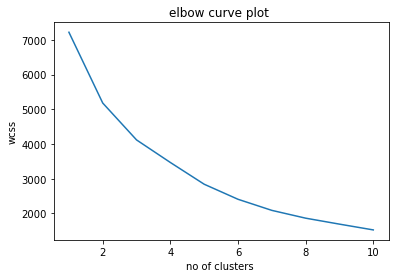

In [85]:
plt.plot(n_clusters , wcss)
plt.xlabel("no of clusters ")
plt.ylabel("wcss")
plt.title("elbow curve plot ")
plt.show()

In [86]:
from sklearn.metrics import silhouette_score


n_clusters=np.arange(2,11)
sil=[]
for j in n_clusters:
    k=KMeans(n_clusters=j,random_state=0)
    pred=k.fit_predict(ps) 
    sil.append(silhouette_score(ps,pred))
    print('Sil_Score for {} clusters is {}'.format(j,np.round(silhouette_score(ps,pred),2)))


Sil_Score for 2 clusters is 0.55
Sil_Score for 3 clusters is 0.32
Sil_Score for 4 clusters is 0.32
Sil_Score for 5 clusters is 0.37
Sil_Score for 6 clusters is 0.36
Sil_Score for 7 clusters is 0.36
Sil_Score for 8 clusters is 0.3
Sil_Score for 9 clusters is 0.29
Sil_Score for 10 clusters is 0.3


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

Text(0, 0.5, 'Silhouette Score')

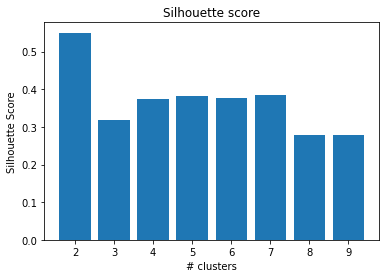

In [87]:
sil_score = []
n_clusters = [2,3,4,5,6,7,8,9]

for i in n_clusters:
    agg = AgglomerativeClustering(n_clusters = i)
    labels = agg.fit_predict(ps)
    sil_score.append(silhouette_score(ps,labels))
    

plt.bar(n_clusters,sil_score)
plt.title('Silhouette score')
plt.xlabel('# clusters')
plt.ylabel('Silhouette Score')

In [89]:
data = linkage(ps , method="ward")

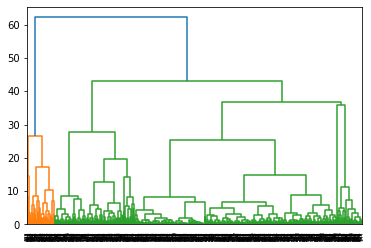

In [90]:
plots = dendrogram(data)
plt.show()

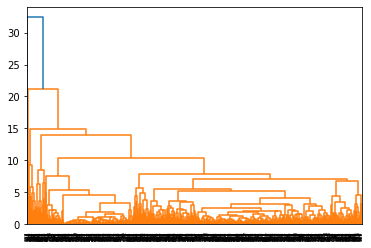

In [91]:
data1 = linkage(ps , method="complete")
plots = dendrogram(data1)
plt.show()

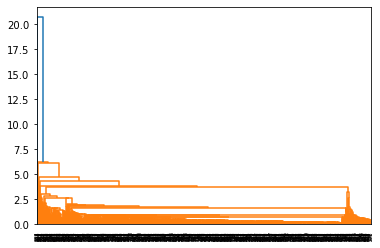

In [93]:
data2 = linkage(ps , method="single")
plots = dendrogram(data2)
plt.show()

In [96]:
ps = DataFrame(ps , columns= df1.columns)

In [97]:
agg = AgglomerativeClustering(n_clusters=2  )
labels = agg.fit_predict(ps)

In [98]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
ps["labels"]= labels

In [104]:
ps

,fuel_consumption,average_speed,distance_travelled,Alarms,max_speed,speedoverlimit,SuddenDcc,SuddenAcc,Total_time_hr,DT_to_Fuel_ratio,labels
0,-0.013774,-0.143498,0.047697,-0.287156,0.921269,1.109194,0.116114,-0.375311,-0.27735,0.013538,0
1,-0.396266,-0.711716,-0.415932,-0.287156,-0.505419,-0.174835,-0.107444,-0.375311,-0.27735,0.023888,0
2,-0.396266,-0.711716,-0.518960,-0.287156,-0.874390,-0.870851,-0.554562,-0.158531,-0.27735,-0.222384,0
3,-0.013774,0.519424,-0.184117,-0.287156,0.675288,-0.066833,-0.554562,-0.592090,-0.27735,-0.020323,0
4,-0.396266,-0.474959,-0.415932,3.482423,-0.382428,-0.114834,-0.107444,0.058248,-0.27735,0.118230,0
...,...,...,...,...,...,...,...,...,...,...,...
717,-0.396266,-0.427607,-0.415932,-0.287156,-0.702203,-0.750848,-0.107444,-0.592090,-0.27735,-0.005899,0
718,-0.396266,0.945589,-0.441689,-0.287156,-0.210242,-0.906851,-0.554562,-0.592090,-0.27735,0.432236,0
719,-0.013774,-0.048794,-0.081089,-0.287156,0.749083,1.289198,1.457466,1.142146,-0.27735,-0.037153,0
720,-0.396266,-0.948474,-0.312903,3.482423,-0.628409,0.833188,-0.554562,-0.592090,-0.27735,-0.084063,0


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from matplotlib.colors import ListedColormap

In [107]:

rf = RandomForestClassifier()
a=ps.drop("labels" , axis =1)
b=ps["labels"]
xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=.3,random_state=0)
model1 = rf.fit(xtrain , ytrain)
pred_dt1 = rf.predict(xtest)

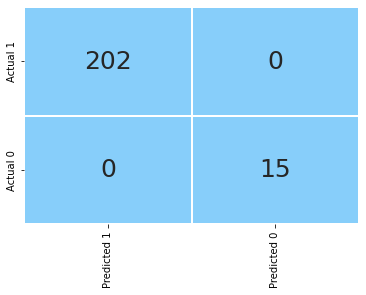

In [108]:
cm = confusion_matrix(ytest,pred_dt1)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

In [109]:
def plot_roc(model):
    y_pred_prob = model1.predict_proba(xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

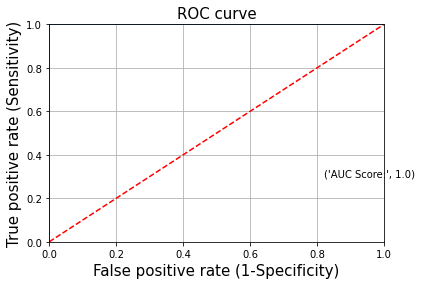

In [110]:
plot_roc(rf)

In [111]:
### Applying PCA

In [115]:
pp =ps.drop("labels" , axis=1)

In [116]:
cov_mat = np.cov(pp.T)
cov_mat

array([[ 1.00138696,  0.62612365,  0.9860398 , -0.03195753,  0.54134807,
         0.59809623,  0.34197857,  0.16226616,  0.85720709,  0.0202397 ],
       [ 0.62612365,  1.00138696,  0.66345612, -0.04943308,  0.8354246 ,
         0.41752767,  0.28774757,  0.13161946,  0.37181219,  0.06674307],
       [ 0.9860398 ,  0.66345612,  1.00138696, -0.05186647,  0.58857612,
         0.64916336,  0.36102438,  0.16202389,  0.86152064,  0.03134275],
       [-0.03195753, -0.04943308, -0.05186647,  1.00138696, -0.02959078,
        -0.05874458, -0.04258436, -0.00365131, -0.05220216,  0.02091636],
       [ 0.54134807,  0.8354246 ,  0.58857612, -0.02959078,  1.00138696,
         0.63257357,  0.50416493,  0.325149  ,  0.3540297 ,  0.05338077],
       [ 0.59809623,  0.41752767,  0.64916336, -0.05874458,  0.63257357,
         1.00138696,  0.68844127,  0.46126706,  0.62674763,  0.03049336],
       [ 0.34197857,  0.28774757,  0.36102438, -0.04258436,  0.50416493,
         0.68844127,  1.00138696,  0.72198586

In [117]:
eig_val , eig_vector = np.linalg.eig(cov_mat)
print("eigen values :" , eig_val)
print("eigen vector :" , eig_vector)

eigen values : [4.68111339 1.56123577 1.05052305 0.99273024 0.92821169 0.38292433
 0.01093582 0.20610304 0.08801396 0.11207834]
eigen vector : [[-0.40763896  0.2932388  -0.11271421  0.10606473  0.09611515  0.27026847
   0.64940049  0.11711258 -0.31090058 -0.33092079]
 [-0.3392997   0.16179116  0.32720498 -0.21454453 -0.47251263  0.20961851
   0.06276428  0.09460078  0.65108542 -0.03997368]
 [-0.41997748  0.28303489 -0.09114768  0.0716654   0.07787854  0.16822357
  -0.75228003  0.06107548 -0.17281026 -0.31013424]
 [ 0.03176082 -0.00989244  0.37483749  0.91147913 -0.15939845 -0.03529483
  -0.01010532  0.01292748  0.02587768  0.00188863]
 [-0.3642878  -0.07690145  0.31365291 -0.18091879 -0.42231958 -0.21055938
  -0.00933813 -0.19654938 -0.57432573  0.37284425]
 [-0.38474472 -0.20003004 -0.07124711  0.04071739  0.1478539  -0.66501078
   0.08286279 -0.37554102  0.24395786 -0.36566732]
 [-0.29842941 -0.53473334 -0.03634912  0.01929269  0.0901296  -0.12161785
  -0.01637392  0.77065255  0.0009

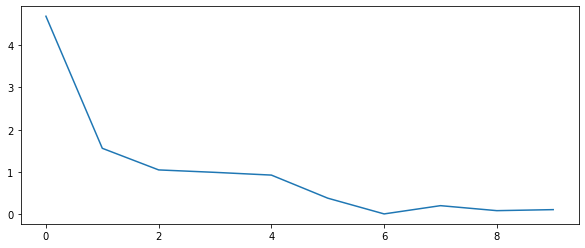

In [118]:
plt.figure(figsize = (10,4))
plt.plot(eig_val)

In [119]:
variation = []

for i in eig_val:
    variation.append(i/np.sum(eig_val)*100)
    
variation 

[46.74629849695388,
 15.590733981748897,
 10.49068036079162,
 9.913552656993579,
 9.2692607707458,
 3.8239396545284814,
 0.10920671542710518,
 2.058175817973896,
 0.8789205247331738,
 1.1192310201035829]

In [122]:
np.cumsum(variation)

array([ 46.7462985 ,  62.33703248,  72.82771284,  82.7412655 ,
        92.01052627,  95.83446592,  95.94367264,  98.00184846,
        98.88076898, 100.        ])

In [123]:
## For 96% of variance, we need 6 PCA dimension for that

In [124]:
pca = PCA(n_components=6, random_state=10)
df_pca = pd.DataFrame(pca.fit_transform(pp), columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.596490,0.201485,0.148018,0.423119,-0.219181,-1.180362
1,-1.027197,0.050033,-0.292722,0.175465,0.375552,-0.299010
2,-1.567509,-0.174489,-0.524574,0.092818,0.244096,0.398756
3,-0.062343,-0.587919,0.400326,0.604979,-0.723303,-0.294510
4,-0.909814,0.338706,1.285299,-3.198137,-0.278530,-0.188252


In [125]:
wcss = []
for i in range(1,21):
    Kmeans = KMeans(n_clusters=i, random_state=10)
    Kmeans.fit(df_pca)
    wcss.append(Kmeans.inertia_)

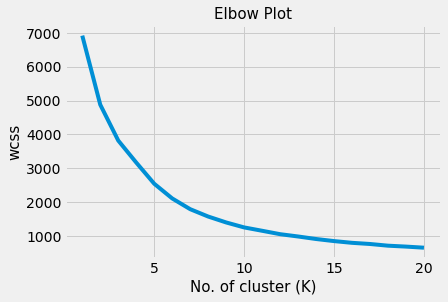

In [127]:
plt.plot(range(1,21), wcss)
plt.style.use('fivethirtyeight')

plt.title('Elbow Plot', fontsize=15)
plt.xlabel('No. of cluster (K)', fontsize=15)
plt.ylabel('wcss', fontsize=15)



plt.show()

In [128]:
from sklearn.metrics import silhouette_score


n_clusters=np.arange(2,11)
sil=[]
for j in n_clusters:
    k=KMeans(n_clusters=j,random_state=0)
    pred=k.fit_predict(df_pca) 
    sil.append(silhouette_score(df_pca,pred))
    print('Sil_Score for {} clusters is {}'.format(j,np.round(silhouette_score(df_pca,pred),2)))


Sil_Score for 2 clusters is 0.55
Sil_Score for 3 clusters is 0.34
Sil_Score for 4 clusters is 0.34
Sil_Score for 5 clusters is 0.4
Sil_Score for 6 clusters is 0.39
Sil_Score for 7 clusters is 0.39
Sil_Score for 8 clusters is 0.34
Sil_Score for 9 clusters is 0.33
Sil_Score for 10 clusters is 0.34


In [129]:
new_cluster = KMeans(n_clusters=2, random_state=10)
new_cluster.fit(df_pca)
df_pca['Cluster'] = new_cluster.labels_

In [130]:
df_pca.Cluster.value_counts()

0    646
1     76
Name: Cluster, dtype: int64

Text(0, 0.5, 'Count')

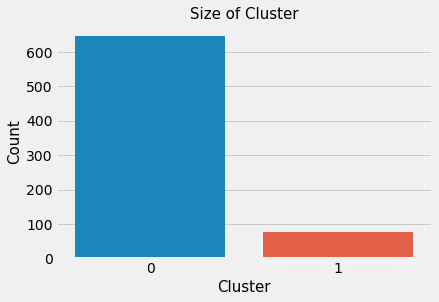

In [132]:
sns.countplot(data= df_pca, x = 'Cluster')

plt.title('Size of Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('Count', fontsize=15)

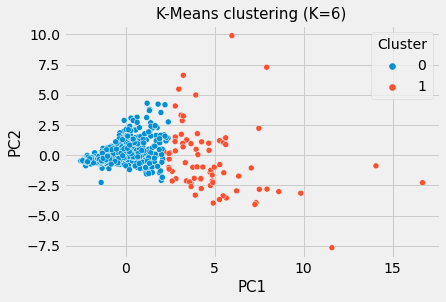

In [143]:
sns.scatterplot(x= 'PC1', y='PC2', data= df_pca, hue='Cluster')

plt.title('K-Means clustering (K=6)', fontsize=15)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)

plt.show()

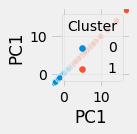

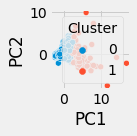

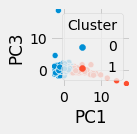

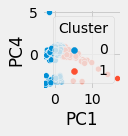

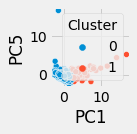

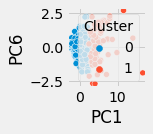

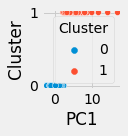

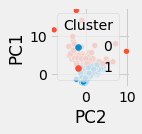

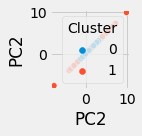

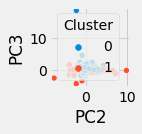

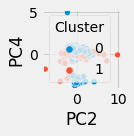

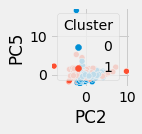

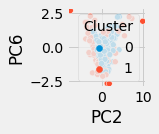

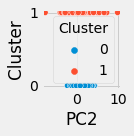

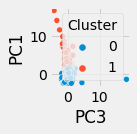

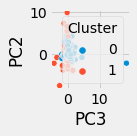

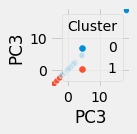

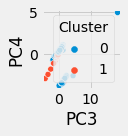

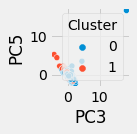

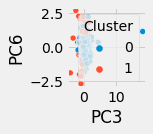

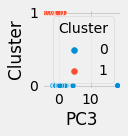

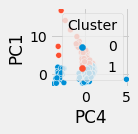

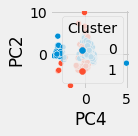

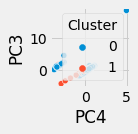

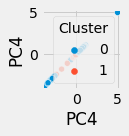

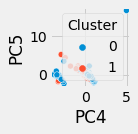

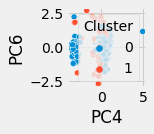

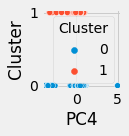

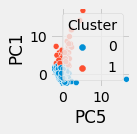

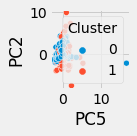

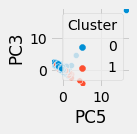

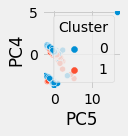

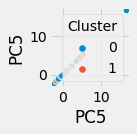

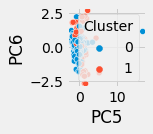

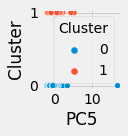

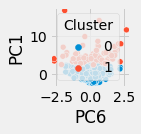

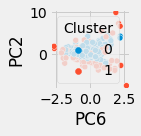

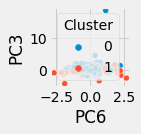

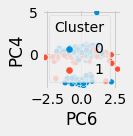

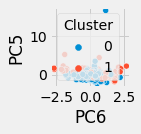

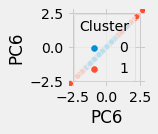

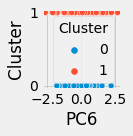

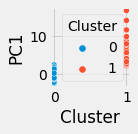

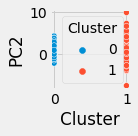

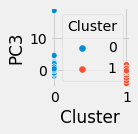

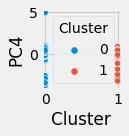

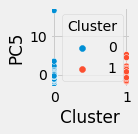

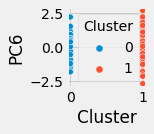

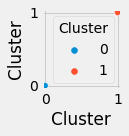

In [160]:
a=5
b=10
c=1
for i in df_pca:
    for j in df_pca:
        plt.figure(figsize=(15,8))
        plt.subplot(a,b,c)
        sns.scatterplot(df_pca[i] , df_pca[j] , hue = df_pca.Cluster)
        c=c+1

In [133]:
df_pca[df_pca['Cluster']==0].head()

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,0.596490,0.201485,0.148018,0.423119,-0.219181,-1.180362,0
1,-1.027197,0.050033,-0.292722,0.175465,0.375552,-0.299010,0
2,-1.567509,-0.174489,-0.524574,0.092818,0.244096,0.398756,0
3,-0.062343,-0.587919,0.400326,0.604979,-0.723303,-0.294510,0
4,-0.909814,0.338706,1.285299,-3.198137,-0.278530,-0.188252,0


In [134]:
df_pca[df_pca['Cluster']==0].describe()

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.0
mean,-0.569914,0.049001,0.046631,0.024223,-0.048420,-0.013508,0.0
std,1.179644,0.886117,1.026054,1.014702,0.917365,0.497900,0.0
min,-2.528596,-2.260771,-1.950739,-3.721036,-2.333395,-1.804522,0.0
25%,-1.421907,-0.526460,-0.440026,0.014843,-0.453296,-0.278463,0.0
50%,-0.794469,-0.221853,-0.027328,0.259386,0.003108,0.034148,0.0
75%,0.217195,0.364900,0.430587,0.489219,0.378904,0.291835,0.0
max,2.392602,4.300149,18.454168,4.967262,16.645940,2.243487,0.0


In [ ]:
df_pca[df_pca['Cluster']==1].head()

In [136]:
df_pca[df_pca['Cluster']==1].describe()

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,4.844266,-0.416509,-0.396367,-0.205897,0.411571,0.114818,1.0
std,2.540917,2.838918,0.931202,0.800437,1.222276,1.238658,0.0
min,2.161821,-7.658729,-4.307455,-3.231766,-1.802711,-2.667534,1.0
25%,3.217682,-2.228469,-0.754693,-0.321500,-0.273617,-0.691777,1.0
50%,4.219168,-0.995196,-0.326319,-0.086027,0.351656,0.236332,1.0
75%,5.500980,1.004906,0.074463,0.168892,0.966151,0.859580,1.0
max,16.682644,9.894099,1.592351,0.989050,5.232969,2.707132,1.0
